# Results
## Evolutionary Strategies and Reinforcement Learning applied to Minesweeper

**Authors**

_Jacob J. Hansen (s134097), Jakob D. Havtorn (s132315),_

_Mathias G. Johnsen (s123249) and Andreas T. Kristensen (s144026)_

## Create Anaconda virtual environment + required packages
In order to run the contents of this notebook, it is recommended to download anaocnda for your platform here
https://www.anaconda.com/download/
and run the following in your terminal to setup everything you need. See file `requirements.txt` for full package list with version numbering.

`conda create --name deep python=3.5.4`

`source activate deep`

`conda install jupyter`

`python -m ipykernel install --user --name deep --display-name "Python (deep)"`

`conda install -c conda-forge keras`

`conda install scikit-learn`

`conda install matplotlib=2.0.2`

`conda install pandas`

`pip install gym`

`pip install mss`

Run jupyter notebook using `jupyter notebook`.

Manually change kernel to `Python (deep)` within the jupyter notebook if not already running.


### Initialization

In [1]:
# Initialization goes here
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas as pd
import math
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def smooth(y,factor):
    if type(y)!=list:
        y = list(y)
    return pd.Series(y).rolling(window=factor).mean()#[factor:]


### Policy Gradient

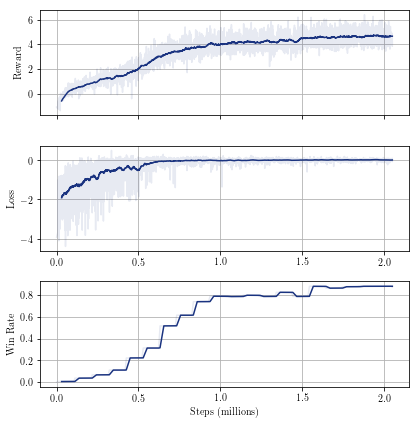

In [2]:
# Plot rewards and winrate
PG_adjust_axis = 1000000
PG_smoothing = 100
PG_color = [0.1, 0.2, 0.5]

PG_steps = []
PG_reward = []
PG_loss = []
PG_winrate = []

stats = pickle.load(open("Results/Policy-Gradients/stats.p", "rb"))
for stat in stats:
    PG_steps.append(stat[1])
    PG_reward.append(stat[2]/1.5)
    PG_loss.append(stat[3])
    PG_winrate.append(stat[4])
PG_steps = pd.Series(PG_steps)/PG_adjust_axis
PG_reward_smooth = smooth(PG_reward,PG_smoothing)
PG_loss_smooth = smooth(PG_loss,PG_smoothing)
PG_winrate_smooth = smooth(PG_winrate,PG_smoothing)

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(311)
plt.plot(PG_steps, PG_reward_smooth, color=PG_color+[1.0])
plt.plot(PG_steps, PG_reward, color=PG_color+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Reward')
plt.grid()

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(PG_steps, PG_loss_smooth, color=PG_color+[1.0])
plt.plot(PG_steps, PG_loss, color=PG_color+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Loss')
plt.grid()

ax3 = plt.subplot(313, sharex=ax2)
plt.plot(PG_steps, PG_winrate_smooth, color=PG_color+[1.0])
plt.plot(PG_steps, PG_winrate, color=PG_color+[0.1], label='_nolegend_')
plt.xlabel('Steps (millions)')
plt.ylabel('Win Rate')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Results/Policy-Gradients/policy-res.pdf'))
plt.show()

### Q-Learning

#### Q-Learning no Discount

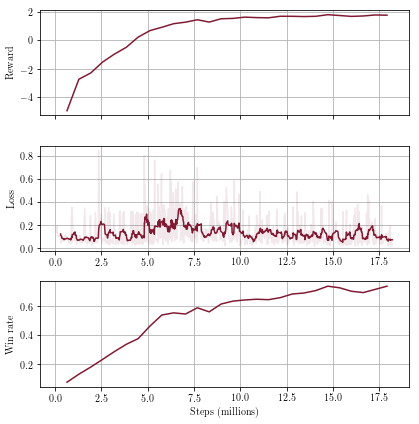

In [3]:
# Plot rewards and winrate
QL_batch_size = 32
QL_adjust_axis = 1000000
QL_smoothing = 10
QL_color = [0.5,0.1,0.2]

QL_reward_pd = pd.read_csv("Results/Q-Learning/evaluation_total_reward_net2_d_0.csv")
QL_reward_num_pd = pd.read_csv("Results/Q-Learning/evaluation_num_rewards_net2_d_0.csv")
QL_reward_pd['Value'] = QL_reward_pd['Value']/QL_reward_num_pd['Value'] # Scale with the number of rewards

QL_reward_smooth_q = smooth(QL_reward_pd['Value'],QL_smoothing)
QL_steps_reward_q = QL_reward_pd['Step']*QL_batch_size/QL_adjust_axis
QL_reward_q = QL_reward_pd['Value']

QL_loss_pd = pd.read_csv("Results/Q-Learning/train_loss_net2_d_0.csv")
QL_steps_loss = QL_loss_pd['Step']*QL_batch_size/QL_adjust_axis
QL_loss_smooth_q = smooth(QL_loss_pd['Value'],QL_smoothing)
QL_loss_q = QL_loss_pd['Value']

QL_loss_smooth_q = QL_loss_smooth_q[1:840]
QL_loss_q = QL_loss_q[1:840]
QL_steps_loss_q = QL_steps_loss[1:840]

QL_winrate_pd = pd.read_csv("Results/Q-Learning/evaluation_win_rate_net2_d_0.csv")
QL_steps_q = QL_winrate_pd['Step']*QL_batch_size/QL_adjust_axis
QL_winrate_q = QL_winrate_pd['Value']/100

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(311)
plt.plot(QL_steps_reward_q, QL_reward_q, color=QL_color+[1.0])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Reward')
plt.grid()
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(QL_steps_loss_q, QL_loss_smooth_q, color=QL_color+[1.0])
plt.plot(QL_steps_loss_q, QL_loss_q, color=QL_color+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Loss')
plt.grid()
ax3 = plt.subplot(313, sharex=ax1)
plt.plot(QL_steps_q, QL_winrate_q, color=QL_color+[1.0])
plt.ylabel('Win rate')
plt.xlabel('Steps (millions)')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Results/Q-Learning/Q-Learning-res_net2_d_0.pdf'))
plt.show()

#### Q-Learning Discount = 0.99

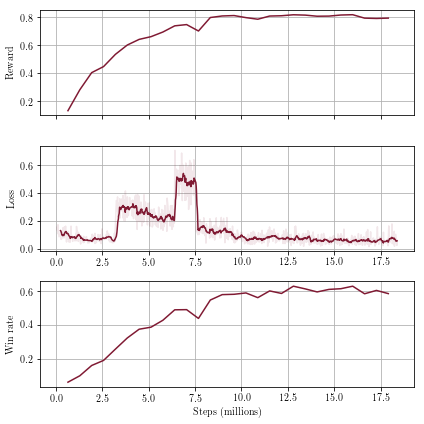

In [4]:
# Plot rewards and winrate
QL_batch_size = 32
QL_adjust_axis = 1000000
QL_smoothing = 10
QL_color = [0.5,0.1,0.2]

QL_reward_pd = pd.read_csv("Results/Q-Learning/evaluation_total_reward_net2_d_0_99.csv")
QL_reward_num_pd = pd.read_csv("Results/Q-Learning/evaluation_num_rewards_net2_d_0_99.csv")
QL_reward_pd['Value'] = QL_reward_pd['Value']/QL_reward_num_pd['Value'] # Scale with the number of rewards

QL_reward_smooth = smooth(QL_reward_pd['Value'],QL_smoothing)
QL_steps_reward = QL_reward_pd['Step']*QL_batch_size/QL_adjust_axis
QL_reward = QL_reward_pd['Value']

QL_loss_pd = pd.read_csv("Results/Q-Learning/train_loss_net2_d_0_99.csv")
QL_steps_loss = QL_loss_pd['Step']*QL_batch_size/QL_adjust_axis
QL_loss_smooth = smooth(QL_loss_pd['Value'],QL_smoothing)
QL_loss = QL_loss_pd['Value']

QL_winrate_pd = pd.read_csv("Results/Q-Learning/evaluation_win_rate_net2_d_0_99.csv")
QL_steps = QL_winrate_pd['Step']*QL_batch_size/QL_adjust_axis
QL_winrate = QL_winrate_pd['Value']/100

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(311)
plt.plot(QL_steps_reward, QL_reward, color=QL_color+[1.0])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Reward')
plt.grid()

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(QL_steps_loss, QL_loss_smooth, color=QL_color+[1.0])
plt.plot(QL_steps_loss, QL_loss, color=QL_color+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Loss')
plt.grid()

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(QL_steps, QL_winrate, color=QL_color+[1.0])
plt.ylabel('Win rate')
plt.xlabel('Steps (millions)')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Results/Q-Learning/Q-Learning-res_net2_d_0_99.pdf'))
plt.show()

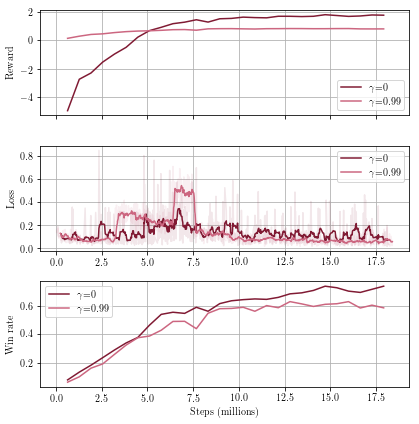

In [5]:
QL_color_2 = [0.8,0.4,0.5]

fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(311)
plt.plot(QL_steps_reward_q, QL_reward_q, color=QL_color+[1.0])
plt.plot(QL_steps_reward, QL_reward, color=QL_color_2+[1.0])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(['$\gamma$=0','$\gamma$=0.99'])
plt.ylabel('Reward')
plt.grid()

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(QL_steps_loss_q, QL_loss_q, color=QL_color+[0.1], label='_nolegend_')
plt.plot(QL_steps_loss, QL_loss, color=QL_color_2+[0.1], label='_nolegend_')
plt.plot(QL_steps_loss_q, QL_loss_smooth_q, color=QL_color+[1.0])
plt.plot(QL_steps_loss, QL_loss_smooth, color=QL_color_2+[1.0])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Loss')
plt.legend(['$\gamma$=0','$\gamma$=0.99'])
plt.grid()

ax3 = plt.subplot(313, sharex=ax1)
plt.plot(QL_steps_q, QL_winrate_q, color=QL_color+[1.0])
plt.plot(QL_steps, QL_winrate, color=QL_color_2+[1.0])
plt.ylabel('Win rate')
plt.legend(['$\gamma$=0','$\gamma$=0.99'])
plt.xlabel('Steps (millions)')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Results/Q-Learning/Q-Learning-res_net2_compare.pdf'))
plt.show()

### Evolutionary Strategies

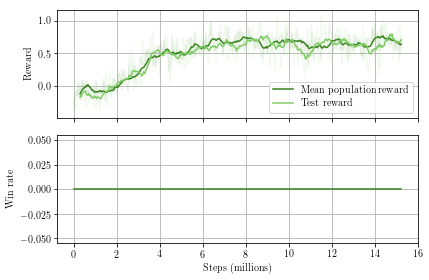

In [6]:
# Plot rewards and winrate
ES_adjust_axis = 1000000
ES_smoothing = 10
ES_color = [0.2,0.5,0.1]
ES_color_test = [0.5,0.8,0.4]

with open(os.path.join('Results/Evolutionary/results.pkl'), 'rb') as f:
    ES_results = pickle.load(f)
ES_steps = pd.Series(ES_results['steps'])/ES_adjust_axis
ES_rewards_mean = ES_results['mean_pop_rewards']
ES_rewards_mean_smooth = smooth(ES_rewards_mean,ES_smoothing)
ES_rewards_test = ES_results['test_rewards']
ES_rewards_test_smooth = smooth(ES_rewards_test,ES_smoothing)
ES_winrate = ES_results['win_rate']

fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot(211)
plt.plot(ES_steps, ES_rewards_mean_smooth, color=ES_color+[1.0])
plt.plot(ES_steps, ES_rewards_mean, color=ES_color+[0.1], label='_nolegend_')
plt.plot(ES_steps, ES_rewards_test_smooth, color=ES_color_test+[1.0])
plt.plot(ES_steps, ES_rewards_test, color=ES_color_test+[0.1], label='_nolegend_')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('Reward')
plt.legend(['Mean population reward', 'Test reward'])
plt.grid()
plt.subplot(212, sharex=ax1)
plt.plot(ES_steps, ES_winrate, color=ES_color+[1.0])
plt.xlabel('Steps (millions)')
plt.ylabel('Win rate')
plt.tight_layout()
plt.grid()
plt.savefig(os.path.join('Results/Evolutionary/evo-res.pdf'))
plt.show()

### Comparison

In [7]:
# Plot winrate in a single plot for comparison

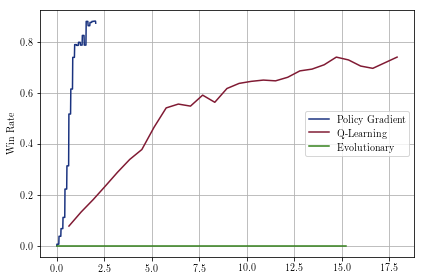

In [8]:
fig = plt.figure(figsize=(6, 4))
plt.plot(PG_steps, PG_winrate, color=PG_color+[1.0])
plt.plot(QL_steps_q, QL_winrate_q, color=QL_color+[1.0])
plt.plot(ES_steps, ES_winrate, color=ES_color+[1.0])
plt.ylabel('Win Rate')
plt.legend(['Policy Gradient','Q-Learning','Evolutionary'])
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Results/compare-res.pdf'))
plt.show()

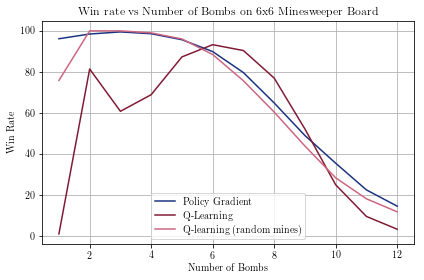

In [9]:
policy_mines = [96.15, 98.46, 99.48, 98.60, 95.68, 89.89, 79.64, 64.83, 48.92, 35.42, 22.39, 14.46]
# Q-learning best model on 6x6 with 6 mines
q_mines = [0.91, 81.38, 60.75, 68.85, 87.29, 93.25, 90.39, 76.96, 52.11, 24.89, 9.44, 3.21]
# Q-learning best model on 6x6 with different number of mines (trained for 1 day with random number of mines
q_mines_random = [75.78, 100, 100, 99.03, 96.05, 88.45, 75.64, 60.37, 43.80, 28.28, 18.05, 11.70]

fig = plt.figure(figsize=(6,4))
plt.plot(range(1,13), policy_mines, color=PG_color+[1.0])
plt.plot(range(1,13), q_mines, color=QL_color+[1.0])
plt.plot(range(1,13), q_mines_random, color=QL_color_2+[1.0])
plt.legend(['Q-Learning'])
plt.title('Win rate vs Number of Bombs on 6x6 Minesweeper Board')
plt.legend(['Policy Gradient','Q-Learning','Q-learning (random mines)'])
plt.ylabel('Win Rate')
plt.xlabel('Number of Bombs')
plt.grid()
plt.tight_layout()
plt.savefig(os.path.join('Results/compare-res_mines.pdf'))
plt.show()

# Testing the Agents

## Policy Gradients
Execute the block below to test the Policy Gradient Agent on 10000 games. 

If you want to see the agent play, you will have to launch the following bash-command from within the /policy_graident-folder:

`python3 test_condensed_6x6_CNN.py --display 1`

In [10]:
import os
filepath = os.getcwd()
os.chdir(filepath)
os.chdir('policy_gradients')
os.environ["KERAS_BACKEND"] = "tensorflow"
%run test_condensed_6x6_CNN.py

Games completed: 0
Games completed: 500
Games completed: 1000
Games completed: 1500
Games completed: 2000
Games completed: 2500
Games completed: 3000
Games completed: 3500
Games completed: 4000
Games completed: 4500
Games completed: 5000
Games completed: 5500
Games completed: 6000
Games completed: 6500
Games completed: 7000
Games completed: 7500
Games completed: 8000
Games completed: 8500
Games completed: 9000
Games completed: 9500
games: 10000, won: 8919, lost: 1081, stuck: 0, win_rate : 89.2%


### Training
Our training script will resume the training from the last checkpoint. You are free to interup training whenver you want, it saves progress every 100. epoch (100 epochs is equivalent to 20000 moves with current batch size). 

To prevent overwriting saved the networks we present as our final solution, below is shown traning for an older network and non-converged network, but the process is the same. All the training and test files a found in the /policy_gradients folder

Win Rate is evaluated on 1000 games and printed every 400. epoch

In [11]:
### De-comment the code below to initiate training of the Policy Gradient agent
# import os
# os.chdir(filepath)
# os.chdir('policy_gradients/')
# %run train_condensed_6x6_v4.py

## Q-Learning

In [12]:
# Load the function
import os
import sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.chdir(filepath)
sys.path.append('q_learning')
from train import *
tf.reset_default_graph()

In [13]:
# Get the 90.20 win-rate
setup_model("test")

Test minesweeper model on 6x6 board with 6 mines
  Win Rate: 90.20


In [14]:
# Get the win-rates for different number of mines
tf.reset_default_graph()
# setup_model("test_random_mines") # runs forever

In [15]:
tf.reset_default_graph()

## Evolutionary Strategies

In [16]:
# Initialization
import multiprocessing as mp
import os
import pstats
import time
import gym
import numpy as np
from keras.layers import Dense, Conv2D, Flatten
from keras.models import Input, Model, Sequential, clone_model, load_model
from keras.optimizers import Adam
os.environ["KERAS_BACKEND"] = "theano"
os.chdir(filepath)
sys.path.append('evolutionary')
sys.path.append('evolutionary/Minesweeper')
from minesweeper_tk import Minesweeper


save_dir = ''
mp.freeze_support()
# Define fitness evaluation function
def fitnessfun(env, model):
    total_reward = 0
    done = False
    observation = env.reset()
    steps = 0
    while not done and steps < rows*cols-mines:
        # Predict action
        action = model.predict(observation.reshape((1, rows, cols, n_chs)))
        # Mask invalid moves (no need to renormalize when argmaxing)
        mask = env.get_validMoves().flatten()
        action[0, ~mask] = 0
        # Step and get reward
        observation, reward, done, info = env.step(np.argmax(action))
        total_reward += reward
        steps += 1
    win = True if done and reward is 0.9 else False
    return total_reward, {'steps': steps, 'win': win}

# Define test function
def testfun(env, model, episodes):
    total_reward = 0
    wins = 0
    for i in range(episodes):
        observation = env.reset()
        done = False
        t = 0
        while not done and t < rows*cols-mines:
            action = model.predict(observation.reshape((1, rows, cols, n_chs)))
            observation, reward, done, info = env.step(np.argmax(action))
            total_reward += reward
            t += 1
        if i % 100 == 0:
            print('Episode: {: >3d}'.format(i))
        wins += 1 if done and reward is 0.9 else 0
    return total_reward/episodes, t, wins

In [17]:
# Define environment 
rows = 4
cols = 4
mines = 4
OUT = 'FULL'
rewards_structure = {"win": 0.9, "loss": -1, "progress": 0.9, "noprogress": -0.3, "YOLO": -0.3}
env = Minesweeper(display=False, OUT=OUT, ROWS=rows, COLS=cols, MINES=mines, rewards=rewards_structure)

In [18]:
# Define model
obs = env.reset()
n_chs = obs.shape[-1]
n_hidden = [200, 200, 200, 200]
n_outputs = rows*cols
model = Sequential()
# Convs
model.add(Conv2D(15, (5, 5), input_shape=(rows, cols, n_chs), padding='same', activation='relu'))
model.add(Conv2D(35, (3, 3), padding='same', activation='relu'))
# Dense
model.add(Flatten())
model.add(Dense(units=n_hidden[0],
                activation='relu',
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros',
                kernel_regularizer=None,#l2(reg),
                bias_regularizer=None))#l2(reg)))
# Hidden
for n_units in n_hidden[1:]:
    model.add(Dense(units=n_units,
                    activation='relu',
                    kernel_initializer='glorot_uniform',
                    bias_initializer='zeros',
                    kernel_regularizer=None,#l2(reg),
                    bias_regularizer=None))#l2(reg)))
# Output
model.add(Dense(units=n_outputs,
                activation='softmax',
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros',
                kernel_regularizer=None,
                bias_regularizer=None))

model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 4, 4, 15)          3765      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 35)          4760      
_________________________________________________________________
flatten_1 (Flatten)          (None, 560)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               112200    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
__________

In [19]:
# (Train)
do_train = False
if do_train:
    from context import core
    from core.strategies import ES
    regu = 0.01
    nags = 20
    lrte = 0.01
    sigm = 0.01
    cint = 100
    nwrk = mp.cpu_count()
    e = ES(fun=fitnessfun, model=model, env=env, reg={'L2': regu}, population=nags, learning_rate=lrte, sigma=sigm, workers=nwrk, save_dir=save_dir)
    e.evolve(ngns, checkpoint_every=cint, plot_every=cint)

In [20]:
# Load pretrained model
test_episodes = 1000
model = load_model('Results/Evolutionary/model.h5')
env = Minesweeper(display=False, OUT=OUT, ROWS=rows, COLS=cols, MINES=mines, rewards=rewards_structure)

# Run game env and save rewards and winrate for 100 games
average_reward, _, wins = testfun(env, model, test_episodes)
print('Win rate: {}'.format(wins/test_episodes))
print('Average test reward: {}'.format(average_reward))

Episode:   0
Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Win rate: 0.0
Average test reward: -0.3338000000000101
